# Dimanod Price Price Prediction

## Prepare The Data

In [2]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv("train.csv")
data_testing=pd.read_csv('test.csv')
data.head()



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [4]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


In [5]:
data.shape

(43040, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:

#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()



,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:


#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape



(43023, 10)

In [9]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(43010, 10)

## توضيح مايجب وما لا يجب

In [10]:
data[data.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
742,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
743,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
744,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
745,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
746,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
38704,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
39749,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
39755,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
40301,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [11]:
data = data.drop_duplicates()

In [12]:
data[data.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['cut', 'color', 'clarity']


In [14]:


# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
1,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
2,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
3,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
4,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47


In [15]:
data.describe()

,carat,depth,table,price,x,y,z
count,42885.000000,42885.000000,42885.000000,42885.000000,42885.000000,42885.000000,42885.000000
mean,0.796478,61.745345,57.439342,3940.965093,5.724767,5.726653,3.535022
std,0.480472,1.418478,2.229737,4019.604899,1.128982,1.120875,0.696862
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.380000,61.000000,56.000000,941.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2389.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.000000,6.500000,6.500000,4.020000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [16]:


# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)


In [17]:

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Data Analysis and Visualization
# Analyze statistics
print(data.describe())









              carat         depth         table         price             x  \
count  42885.000000  42885.000000  42885.000000  42885.000000  42885.000000   
mean       0.796478     61.745345     57.439342   3940.965093      5.724767   
std        0.480472      1.418478      2.229737   4019.604899      1.128982   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.380000     61.000000     56.000000    941.000000      4.660000   
50%        0.710000     61.800000     57.000000   2389.000000      5.710000   
75%        1.030000     62.500000     59.000000   5309.000000      6.500000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  42885.000000  42885.000000  
mean       5.726653      3.535022  
std        1.120875      0.696862  
min        3.680000      2.060000  
25%        4.670000      2.870000  
50%        5.720000      3.530000  
75%        6.500000      4.020000  


R^2: 0.9795632415251377
Adjusted R^2: 0.9795460709849703
MAE: 277.6087673378871
MSE: 328796.6866050808
RMSE: 573.4079582680038

/home/osama/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


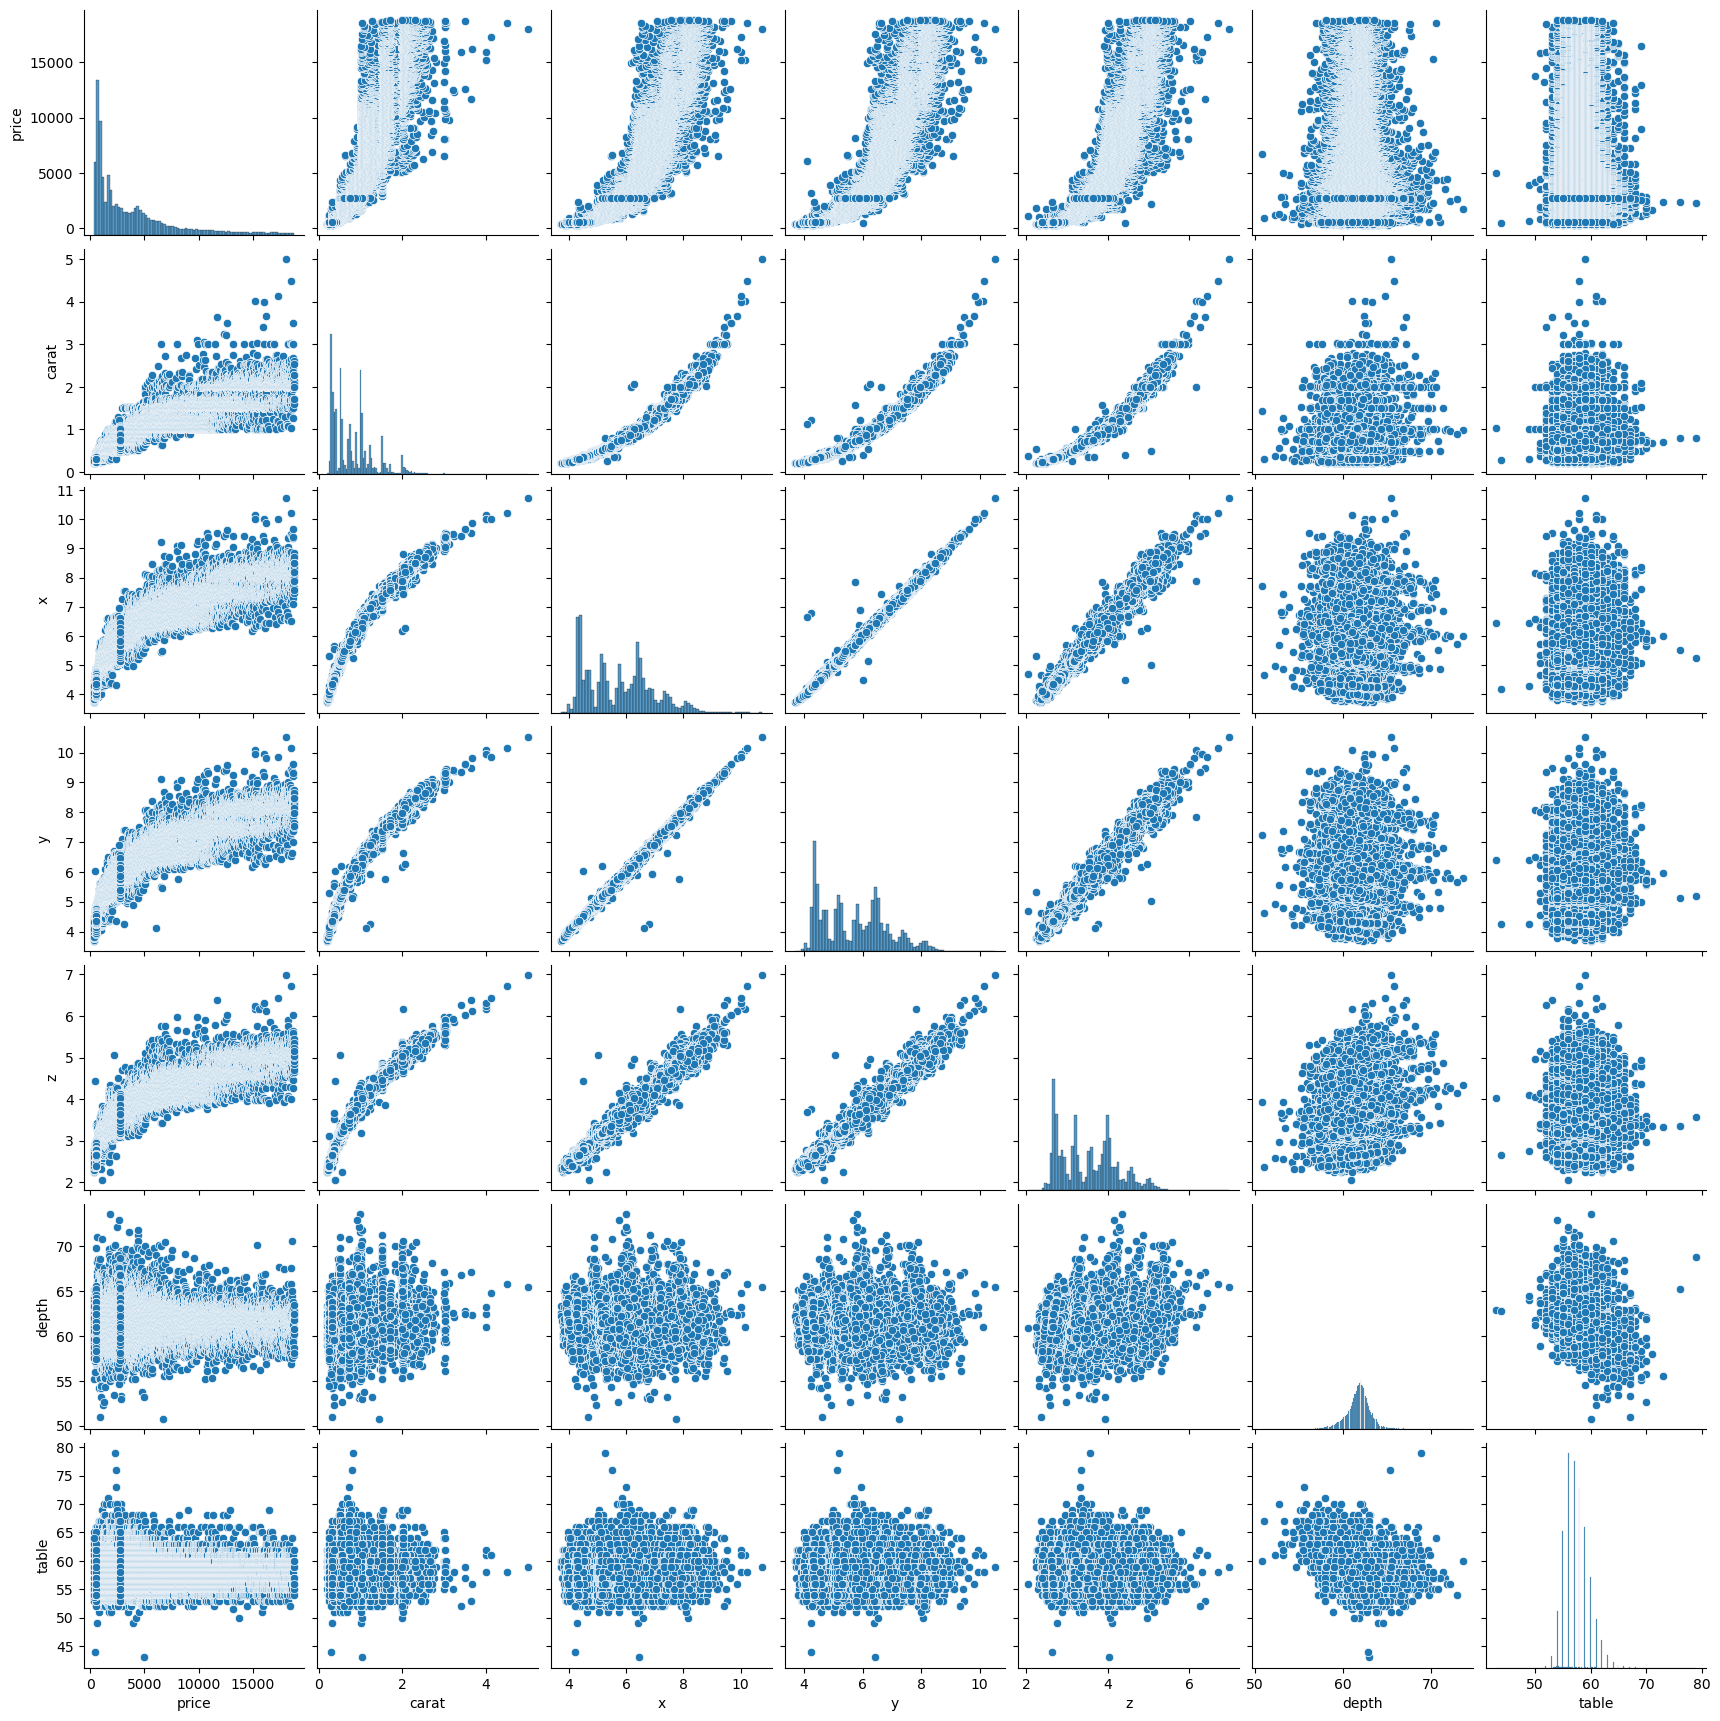

In [18]:

# Visualize the data
sns.pairplot(data, vars=['price', 'carat', 'x', 'y', 'z', 'depth', 'table'])
plt.show()


In [20]:

# Model Training and Evaluation
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Support Vector Regression model
# svr_model = SVR()
# svr_model.fit(X_train_scaled, y_train)

# Model Evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

# Evaluate Linear Regression model
lr_mse, lr_mae, lr_r2 = evaluate_model(lr_model, X_val_scaled, y_val)
print("Linear Regression - Validation Set")
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R-squared:", lr_r2)

# Evaluate Decision Tree model
dt_mse, dt_mae, dt_r2 = evaluate_model(dt_model, X_val_scaled, y_val)
print("Decision Tree - Validation Set")
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("R-squared:", dt_r2)

# Evaluate Random Forest model
rf_mse, rf_mae, rf_r2 = evaluate_model(rf_model, X_val_scaled, y_val)
print("Random Forest - Validation Set")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)

# Evaluate Support Vector Regression model
# svr_mse, svr_mae, svr_r2 = evaluate_model(svr_model, X_val_scaled, y_val)
# print("Support Vector Regression - Validation Set")
# print("Mean Squared Error:", svr_mse)
# print("Mean Absolute Error:", svr_mae)
# print("R-squared:", svr_r2)

# Model Selection
# Compare the models based on evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression']
mse_scores = [lr_mse, dt_mse, rf_mse,
#  svr_mse
 ]
mae_scores = [lr_mae, dt_mae, rf_mae,
#  svr_mae
 ]
r2_scores = [lr_r2, dt_r2, rf_r2,
#  svr_r2
 ]

Linear Regression - Validation Set
Mean Squared Error: 1819746.7788916507
Mean Absolute Error: 864.7917513487315
R-squared: 0.8885293129526788
Decision Tree - Validation Set
Mean Squared Error: 618742.2712486883
Mean Absolute Error: 382.3237728809607
R-squared: 0.9620982287858095
Random Forest - Validation Set
Mean Squared Error: 317854.27065751166
Mean Absolute Error: 280.8707765105459
R-squared: 0.9805294701756812


In [ ]:
models

NameError: name 'models' is not defined

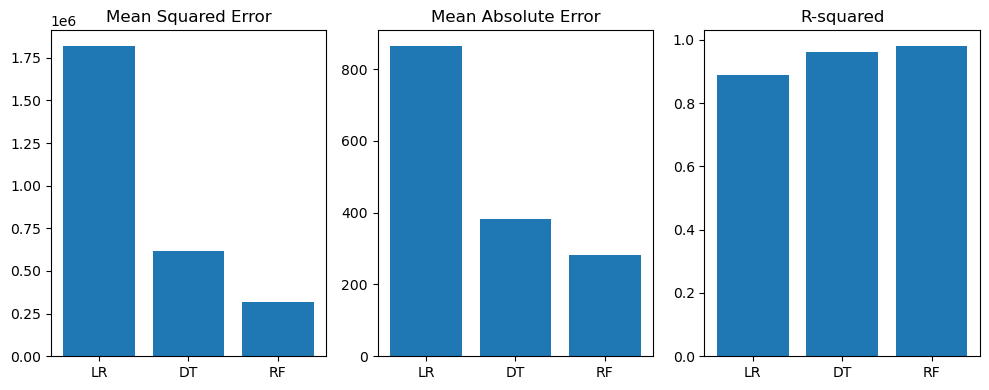

In [21]:
models = ['LR', 'DT', 'RF', 
# 'SVR'
]


# Plot the evaluation metrics
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(models, mse_scores)
plt.title("Mean Squared Error")
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores)
plt.title("Mean Absolute Error")
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores)
plt.title("R-squared")
plt.tight_layout()
plt.show()

Random Forest - Testing Set
Mean Squared Error: 330622.1744766146
Mean Absolute Error: 288.6137354460342
R-squared: 0.9800639466869372


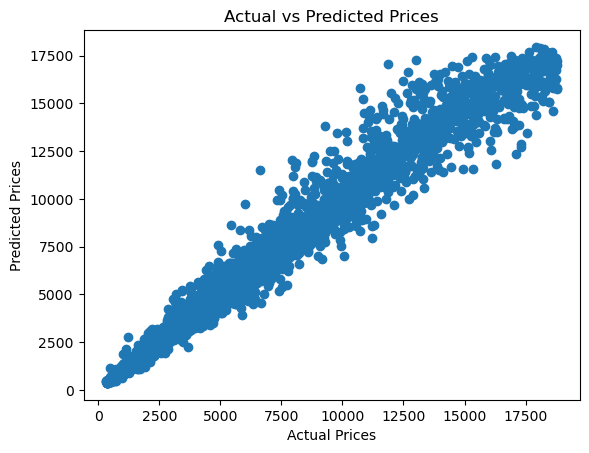

In [22]:

# Model Testing
# Test the selected model on the testing set
test_mse, test_mae, test_r2 = evaluate_model(rf_model, X_test_scaled, y_test)
print("Random Forest - Testing Set")
print("Mean Squared Error:", test_mse)
print("Mean Absolute Error:", test_mae)
print("R-squared:", test_r2)

# Visualization
# Predicted vs Actual Prices
y_pred = rf_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

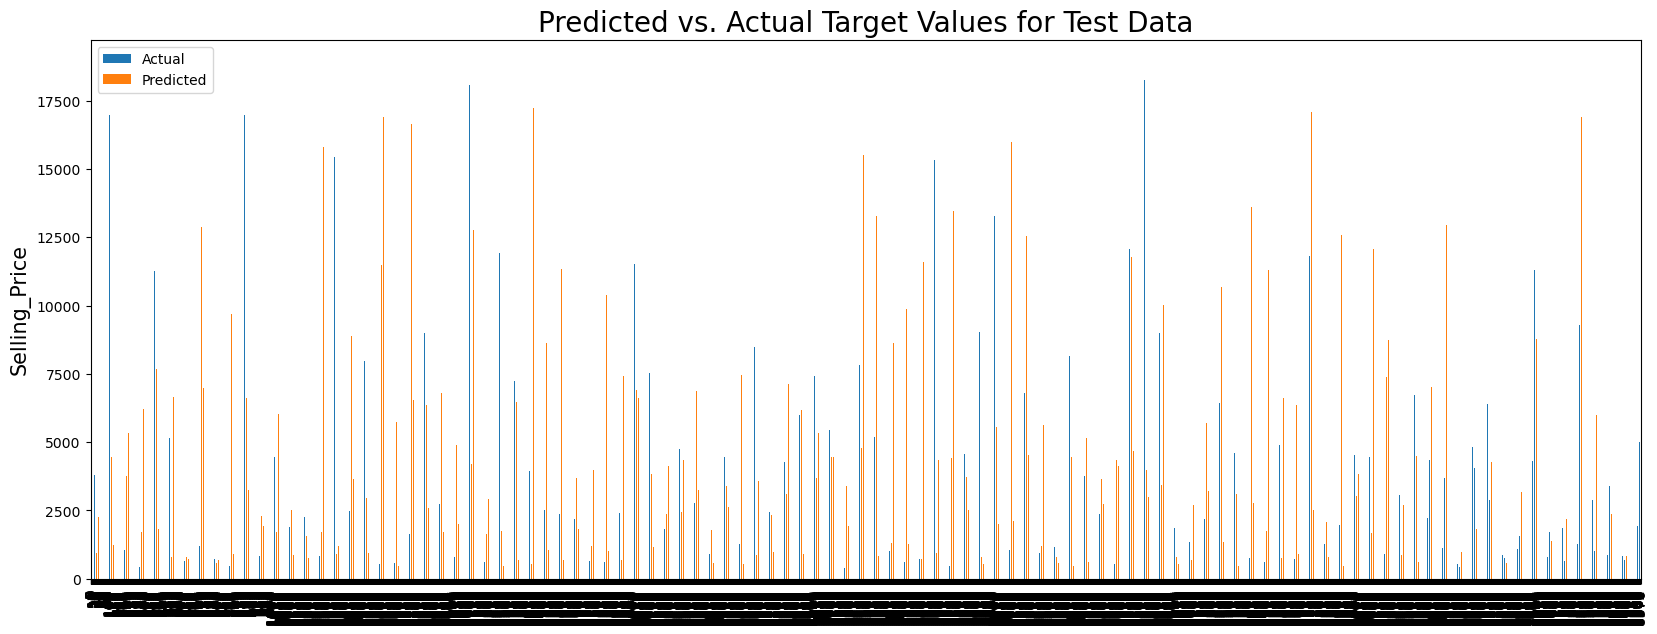

In [23]:
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.2)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)